In [168]:
import numpy as np
import math
import os
import random
import matplotlib.pyplot as plt

# TWO LAYERS

def sigmoid(x):
    return 1/(1 + math.exp(-x))

#calculate weights correction in backpropagation
def calculateDeltaWeights(weights, inPut, y, error):
    deltaWeights = np.zeros(weights.shape)
    for k, inp in zip(range(inPut.size), inPut):
        for n, y_ in zip(range(y.size), y):
            deltaWeights[k, n] = 0.01*error[n]*(1-y_)*y_*inp #jak z tym minusem?
    return deltaWeights

# calculate an error for a layer in backpropagation
def calculateLayerErrors(weights, inPut, y, error):
    layerErrors = np.zeros(inPut.shape)
    for k, inp in zip(range(inPut.size), inPut):
        for n, y_ in zip(range(y.size), y):
            layerErrors[k] += error[n]*(1-y_)*y_*weights[k, n]
    return layerErrors

# not used
'''def myDot(inPut, weights):
    y = np.zeros(weights.shape[1])
    for n in range(y.size):
        for k, inp in zip(range(inPut.size), inPut):
            y[n] += inp*weights[k, n]
    return y'''

class neuralNetwork:
    def __init__(self, inPut, outPut):
        self.inPut      = inPut #input data
        self.weights1   = 0.1*np.ones((inPut.size,4), dtype = np.float64)
        self.weights2   = 0.1*np.ones((4, 3), dtype = np.float64) 
        self.weights3   = 0.1*np.ones((3, outPut.size), dtype = np.float64)
        self.outPut     = outPut #desired output
        self.y          = np.empty(outPut.size, dtype = np.float64) #calculated output
        self.epochLoss  = np.empty((0), dtype = np.float64) # loss in each epoch
        self.loss       = np.empty((0), dtype = np.float64) # average loss in each epoch
        self.delta      = np.empty((0), dtype = np.float64)
    
    def setInPut(self, inPut):
        self.inPut = inPut

    def setOutPut(self, outPut):
        self.outPut = outPut
        
    def feedforward(self):
        func = np.vectorize(sigmoid)
        self.layer1 = func(np.dot(self.inPut, self.weights1))
        self.layer2 = func(np.dot(self.layer1, self.weights2))
        self.y = func(np.dot(self.layer2, self.weights3))
    
    def backpropagation(self):
        self.delta = self.outPut - self.y
        self.epochLoss = np.append(self.epochLoss, np.average(np.absolute(self.delta)))
        
        # calculate correction for weights3 (between output and layer2)
        deltaWeights3 = calculateDeltaWeights(self.weights3, self.layer2, self.y, self.delta)
        self.weights3 += deltaWeights3   
        # calculate errors for layer2
        layer2Errors = calculateLayerErrors(self.weights3, self.layer2, self.y, self.delta)

        # calculate correction for weights2 (between layer2 and layer1)
        deltaWeights2 = calculateDeltaWeights(self.weights2, self.layer1, self.layer2, layer2Errors)
        self.weights2 += deltaWeights2        
        # calculate errors for layer1
        layer1Errors = calculateLayerErrors(self.weights2, self.layer1, self.layer2, layer2Errors)

        # calculate correction for weights1 (between layer1 and input)
        deltaWeights1 = calculateDeltaWeights(self.weights1, self.inPut, self.layer1, layer1Errors)
        self.weights1 += deltaWeights1

0
10
20
30
40


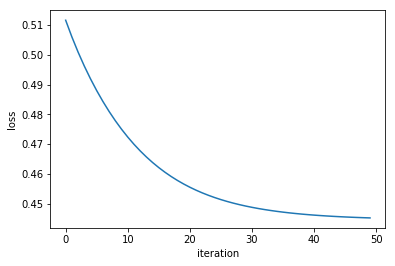

In [169]:
filename = 'iris.txt'
if os.path.isfile(filename):
    f = open(filename, "r")
    data = np.asarray([line.split() for line in f], dtype = np.float64)
    np.random.shuffle(data)
    train = data[:140]
    test = data[140:]
    inPutData = np.asarray([row[:4] for row in train], dtype = np.float64)
    outPutData = np.asarray([row[4:] for row in train], dtype = np.float64)
    inPutTest = np.asarray([row[:4] for row in test], dtype = np.float64)
    outPutTest = np.asarray([row[4:] for row in test], dtype = np.float64)
    f.close() 

# initialize net
net = neuralNetwork(inPutData[0, :], outPutData[0, :])
# learning
for i in range(100):
    if i%10==0: print(i)
    for inp, outp in zip(inPutData, outPutData):
        net.setInPut(inp)
        net.setOutPut(outp)
        net.feedforward()
        net.backpropagation()
    net.loss = np.append(net.loss, np.average(net.epochLoss))
    net.epochLoss = np.empty((0))
# show loss
plt.plot(net.loss)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

In [170]:
# test results
for inp, outp in zip(inPutTest, outPutTest):
    net.setInPut(inp)
    net.setOutPut(outp)
    net.feedforward()
    #print('net.inPut')
    #print(net.inPut)
    print('net.outPut')
    print(net.outPut)
    print('net.y')
    print(net.y)
    print('')

net.outPut
[0. 1. 0.]
net.y
[0.33881287 0.33210305 0.33299065]

net.outPut
[0. 0. 1.]
net.y
[0.33929163 0.33259844 0.33348386]

net.outPut
[0. 0. 1.]
net.y
[0.33700259 0.33023013 0.33112592]

net.outPut
[0. 0. 1.]
net.y
[0.33745028 0.33069328 0.33158705]

net.outPut
[1. 0. 0.]
net.y
[0.34196386 0.33536409 0.33623728]

net.outPut
[0. 1. 0.]
net.y
[0.33940481 0.33271556 0.33360046]

net.outPut
[0. 0. 1.]
net.y
[0.33747137 0.33071509 0.33160877]

net.outPut
[0. 1. 0.]
net.y
[0.33779003 0.33104476 0.331937  ]

net.outPut
[1. 0. 0.]
net.y
[0.34164673 0.33503582 0.33591047]

net.outPut
[0. 1. 0.]
net.y
[0.33894617 0.33224098 0.33312797]

